In [424]:
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv("testlog.csv", header=None, names = ('time','src','dst','sport','dport','byte'))
df.head()

,time,src,dst,sport,dport,byte
0,1490620195,75.49.208.65,44.85.22.206,13201,921,320654
1,1490620195,75.49.208.65,44.85.22.206,13201,921,175537
2,1490620195,75.49.208.65,44.85.22.206,13201,921,269261
3,1490620195,75.49.208.65,44.85.22.206,13201,921,410208
4,1490620195,75.49.208.65,44.85.22.206,13201,921,195311


In [425]:
dfg = df.groupby('time')['src'].count()

In [426]:
dfg.head()

time
1490620195     5
1490620196    44
1490620197     2
1490620198    39
1490620199     5
Name: src, dtype: int64

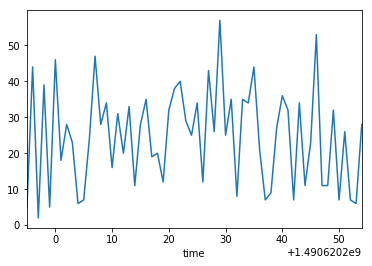

In [427]:
dfg.plot()

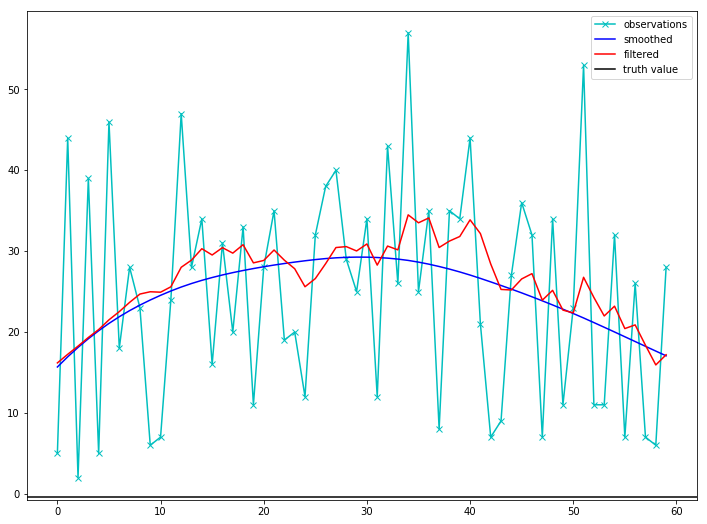

In [428]:
import numpy as np
from matplotlib import pylab as plt
from pykalman import KalmanFilter

x = -0.37727
observations = dfg.tolist()

kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01*np.eye(2))

smoothed_states_pred = kf.em(observations).smooth(observations)[0]
filtered_states_pred = kf.em(observations).filter(observations)[0]

plt.figure(figsize=(12, 9))
plt.plot(observations, "-xc", label="observations")
plt.plot(smoothed_states_pred[:, 0], "b", label="smoothed")
plt.plot(filtered_states_pred[:, 0], "r", label="filtered")
plt.axhline(x, color="k", label="truth value")
plt.legend()
plt.show()

In [429]:
dfg2 = df.groupby(['time','src'])['dst'].count()

In [430]:
dfg = pd.DataFrame({'time': dfg.index, 'total':dfg.values})

In [431]:
dfg2.head()

time        src           
1490620195  75.49.208.65      5
1490620196  138.128.90.167    6
            141.241.69.215    5
            203.73.148.20     7
            229.246.198.14    5
Name: dst, dtype: int64

In [432]:
a,b=zip(*dfg2.index.tolist())

In [433]:
dfg2 = pd.DataFrame({'time':a,'src':b,'src_cnt':dfg2.values})

In [434]:
df2 = pd.merge(dfg2,dfg,on='time')

In [435]:
df2.head()

,src,src_cnt,time,total
0,75.49.208.65,5,1490620195,5
1,138.128.90.167,6,1490620196,44
2,141.241.69.215,5,1490620196,44
3,203.73.148.20,7,1490620196,44
4,229.246.198.14,5,1490620196,44


In [436]:
df2['srcp'] = df2.src_cnt/df2.total

In [437]:
df2.head()

,src,src_cnt,time,total,srcp
0,75.49.208.65,5,1490620195,5,1.000000
1,138.128.90.167,6,1490620196,44,0.136364
2,141.241.69.215,5,1490620196,44,0.113636
3,203.73.148.20,7,1490620196,44,0.159091
4,229.246.198.14,5,1490620196,44,0.113636


In [438]:
df2['entropy']=df2.srcp.apply(func=np.log2)*-1

In [439]:
df2.head()

,src,src_cnt,time,total,srcp,entropy
0,75.49.208.65,5,1490620195,5,1.000000,-0.000000
1,138.128.90.167,6,1490620196,44,0.136364,2.874469
2,141.241.69.215,5,1490620196,44,0.113636,3.137504
3,203.73.148.20,7,1490620196,44,0.159091,2.652077
4,229.246.198.14,5,1490620196,44,0.113636,3.137504


In [440]:
df2['pent'] = df2.srcp * df2.entropy

In [441]:
df2.head()

,src,src_cnt,time,total,srcp,entropy,pent
0,75.49.208.65,5,1490620195,5,1.000000,-0.000000,-0.000000
1,138.128.90.167,6,1490620196,44,0.136364,2.874469,0.391973
2,141.241.69.215,5,1490620196,44,0.113636,3.137504,0.356534
3,203.73.148.20,7,1490620196,44,0.159091,2.652077,0.421921
4,229.246.198.14,5,1490620196,44,0.113636,3.137504,0.356534


In [442]:
dfg = df2.groupby('time')['pent'].sum()

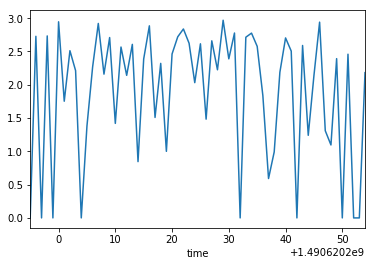

In [443]:
dfg.plot()

In [444]:
import struct
import socket

def ip2int(addr):                                                               
    return struct.unpack("!I", socket.inet_aton(addr))[0] 


def int2ip(addr):                                                               
    return socket.inet_ntoa(struct.pack("!I", addr))  



In [445]:
df['srcn'] = df.src.apply(ip2int)

In [446]:
df['srcn'] =df.srcn.apply(lambda x: x >>16 << 16 )
dfg = df.groupby('time')['src'].count()

In [447]:
df['src2']=df.srcn.apply(int2ip)

In [448]:
dfg2 = df.groupby(['time','src2'])['dst'].count()

In [449]:
dfg2.head()

time        src2       
1490620195  75.49.0.0      5
1490620196  138.128.0.0    6
            141.241.0.0    5
            203.73.0.0     7
            229.246.0.0    5
Name: dst, dtype: int64

In [450]:
a,b=zip(*dfg2.index.tolist())

In [451]:
dfg2 = pd.DataFrame({'time':a,'src':b,'src_cnt':dfg2.values})

In [452]:
dfg = pd.DataFrame({'time': dfg.index, 'total':dfg.values})

In [453]:
df2 = pd.merge(dfg2,dfg,on='time')
df2.head()

,src,src_cnt,time,total
0,75.49.0.0,5,1490620195,5
1,138.128.0.0,6,1490620196,44
2,141.241.0.0,5,1490620196,44
3,203.73.0.0,7,1490620196,44
4,229.246.0.0,5,1490620196,44


In [454]:
df2['srcp'] = df2.src_cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy
dfg = df2.groupby('time')['pent'].sum()

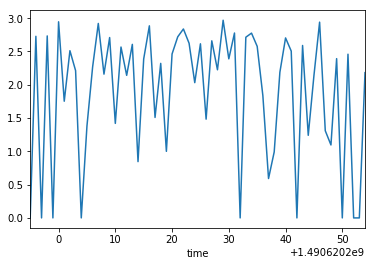

In [455]:
dfg.plot()

,src,src_cnt,time,total,srcp,entropy,pent
0,75.0.0.0,5,1490620195,5,1.000000,-0.000000,-0.000000
1,138.0.0.0,6,1490620196,44,0.136364,2.874469,0.391973
2,141.0.0.0,5,1490620196,44,0.113636,3.137504,0.356534
3,203.0.0.0,7,1490620196,44,0.159091,2.652077,0.421921
4,229.0.0.0,5,1490620196,44,0.113636,3.137504,0.356534


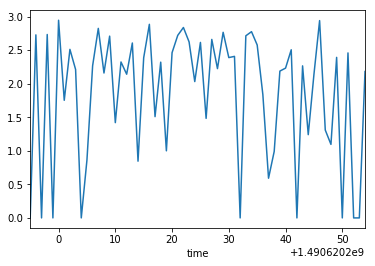

In [456]:
df['srcn'] = df.src.apply(ip2int)
df['srcn'] =df.srcn.apply(lambda x: x >>24 << 24 )
dfg = df.groupby('time')['src'].count()
df['src2']=df.srcn.apply(int2ip)
dfg2 = df.groupby(['time','src2'])['dst'].count()
a,b=zip(*dfg2.index.tolist())
dfg2 = pd.DataFrame({'time':a,'src':b,'src_cnt':dfg2.values})
dfg = pd.DataFrame({'time': dfg.index, 'total':dfg.values})
df2 = pd.merge(dfg2,dfg,on='time')
df2['srcp'] = df2.src_cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy
dfg = df2.groupby('time')['pent'].sum()
dfg.plot()
df2.head()

,src,src_cnt,time,total,srcp,entropy,pent
0,0.0.0.0,5,1490620195,5,1.000000,-0.000000,-0.000000
1,0.0.0.0,9,1490620196,44,0.204545,2.289507,0.468308
2,128.0.0.0,35,1490620196,44,0.795455,0.330149,0.262618
3,128.0.0.0,2,1490620197,2,1.000000,-0.000000,-0.000000
4,0.0.0.0,11,1490620198,39,0.282051,1.825971,0.515017


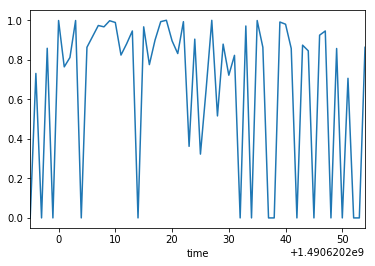

In [457]:
df['srcn'] = df.src.apply(ip2int)
df['srcn'] =df.srcn.apply(lambda x: x >>31 << 31 )
dfg = df.groupby('time')['src'].count()
df['src2']=df.srcn.apply(int2ip)
dfg2 = df.groupby(['time','src2'])['dst'].count()
a,b=zip(*dfg2.index.tolist())
dfg2 = pd.DataFrame({'time':a,'src':b,'src_cnt':dfg2.values})
dfg = pd.DataFrame({'time': dfg.index, 'total':dfg.values})
df2 = pd.merge(dfg2,dfg,on='time')
df2['srcp'] = df2.src_cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy
dfg = df2.groupby('time')['pent'].sum()
dfg.plot()
df2.head()

,src,src_cnt,time,total,srcp,entropy,pent
0,0.0.0.0,5,1490620195,5,1.0,-0.0,-0.0
1,0.0.0.0,44,1490620196,44,1.0,-0.0,-0.0
2,0.0.0.0,2,1490620197,2,1.0,-0.0,-0.0
3,0.0.0.0,39,1490620198,39,1.0,-0.0,-0.0
4,0.0.0.0,5,1490620199,5,1.0,-0.0,-0.0


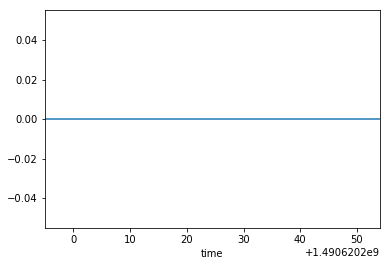

In [458]:
df['srcn'] = df.src.apply(ip2int)
df['srcn'] =df.srcn.apply(lambda x: x >>32 << 32 )
dfg = df.groupby('time')['src'].count()
df['src2']=df.srcn.apply(int2ip)
dfg2 = df.groupby(['time','src2'])['dst'].count()
a,b=zip(*dfg2.index.tolist())
dfg2 = pd.DataFrame({'time':a,'src':b,'src_cnt':dfg2.values})
dfg = pd.DataFrame({'time': dfg.index, 'total':dfg.values})
df2 = pd.merge(dfg2,dfg,on='time')
df2['srcp'] = df2.src_cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy
dfg = df2.groupby('time')['pent'].sum()
dfg.plot()
df2.head()

In [459]:
dfg= df.groupby('src')['src'].count()
df2 = pd.DataFrame({'src': dfg.index,'cnt': dfg.values, 'total':dfg.values.sum()})
df2['srcp'] = df2.cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy

In [460]:
df2.head()

,cnt,src,total,srcp,entropy,pent
0,1,10.106.53.8,1486,0.000673,10.537218,0.007091
1,7,101.147.94.197,1486,0.004711,7.729863,0.036413
2,4,102.59.171.66,1486,0.002692,8.537218,0.022980
3,2,106.218.105.154,1486,0.001346,9.537218,0.012836
4,8,11.198.118.77,1486,0.005384,7.537218,0.040577


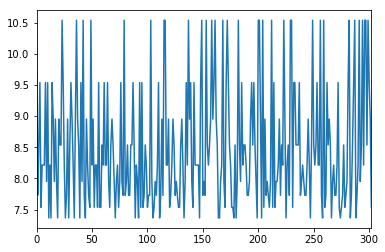

In [461]:
df2.entropy.plot()

In [462]:
dfg= df.groupby(['src','dst'])['src'].count()
df2 = pd.DataFrame({'src': dfg.index,'cnt': dfg.values, 'total':dfg.values.sum()})
df2['srcp'] = df2.cnt/df2.total
df2['entropy']=df2.srcp.apply(func=np.log2)*-1
df2['pent'] = df2.srcp * df2.entropy
df2.head()

,cnt,src,total,srcp,entropy,pent
0,1,"(10.106.53.8, 49.16.193.100)",1486,0.000673,10.537218,0.007091
1,7,"(101.147.94.197, 87.42.52.128)",1486,0.004711,7.729863,0.036413
2,4,"(102.59.171.66, 53.26.190.222)",1486,0.002692,8.537218,0.022980
3,2,"(106.218.105.154, 191.31.231.30)",1486,0.001346,9.537218,0.012836
4,8,"(11.198.118.77, 16.115.177.152)",1486,0.005384,7.537218,0.040577


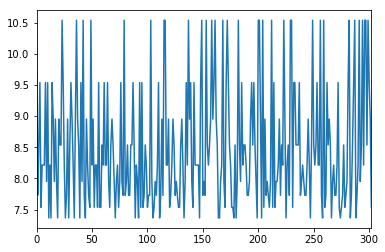

In [463]:
df2.entropy.plot()

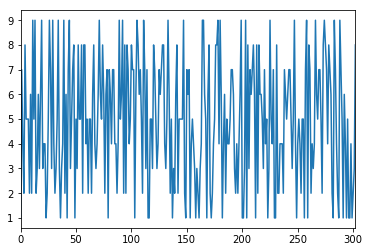

In [464]:
df2.cnt.plot()